In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
merged_df = pd.read_csv('/content/drive/MyDrive/ds_vyshnavi_sai_sri/csv_files /merged_dataset.csv')

In [49]:
merged_df['PnL_Class'] = (merged_df['closedPnL'] > 0).astype(int)

merged_df['fee_ratio'] = merged_df['fee'] / (merged_df['size'] + 1e-6)
merged_df['size_to_fee_ratio'] = merged_df['size'] / (merged_df['fee'] + 1e-6)
merged_df['is_greed'] = merged_df['Classification'].apply(lambda x: 1 if 'Greed' in x else 0)



In [50]:
features = ['size', 'fee', 'fee_ratio', 'size_to_fee_ratio', 'is_greed']
X = merged_df[features]
y = merged_df['PnL_Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [51]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_resampled, y_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:21:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [52]:
y_pred = xgb.predict(X_test)


In [53]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[15944  8904]
 [ 6274 11122]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.68     24848
           1       0.56      0.64      0.59     17396

    accuracy                           0.64     42244
   macro avg       0.64      0.64      0.64     42244
weighted avg       0.65      0.64      0.64     42244



In [54]:
sentiment_profit_rate = merged_df.groupby('Classification')['PnL_Class'].mean()
print("\n Profit Rate by Sentiment:")
print(sentiment_profit_rate)


 Profit Rate by Sentiment:
Classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: PnL_Class, dtype: float64


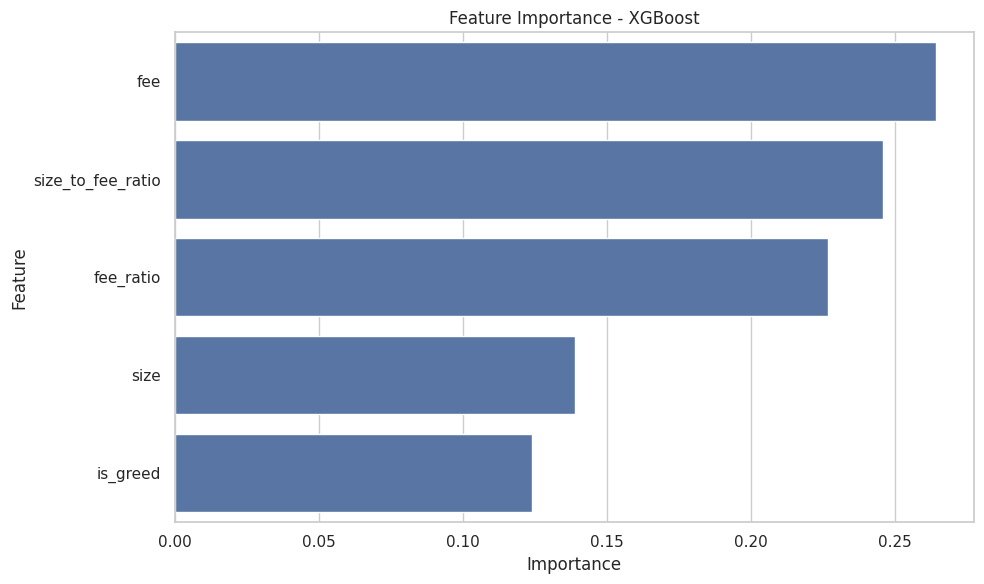

In [55]:
importances = xgb.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_vyshnavi_sai_sri/Outputs ')
plt.show()


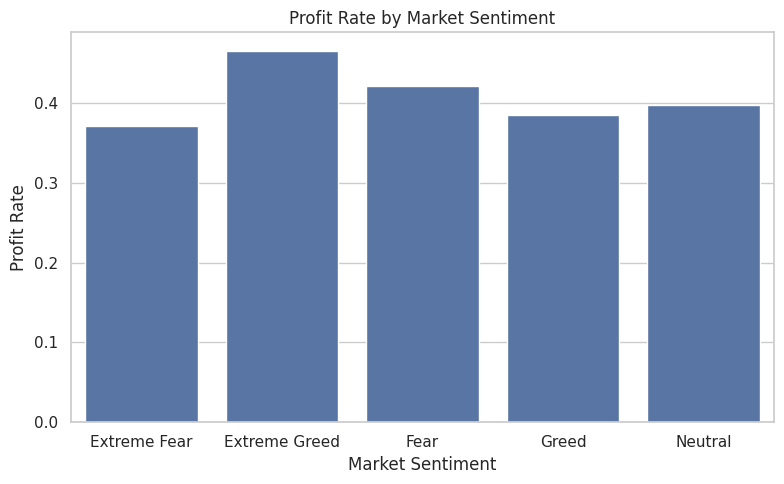

In [56]:
# Step 11.1: Plot Profit Rate by Sentiment
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_profit_rate.index, y=sentiment_profit_rate.values)
plt.title('Profit Rate by Market Sentiment')
plt.ylabel('Profit Rate')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_vyshnavi_sai_sri/Outputs2')
plt.show()
